In [26]:
import os
from PIL import Image
# directorio = "/Users/vivi/Google Drive/ITBA/imagenes"
# directorio2 = "/Users/vivi/Google Drive/ITBA/imagenes"

directorio = "/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/"
directorio2 = "/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/Landsat8/"

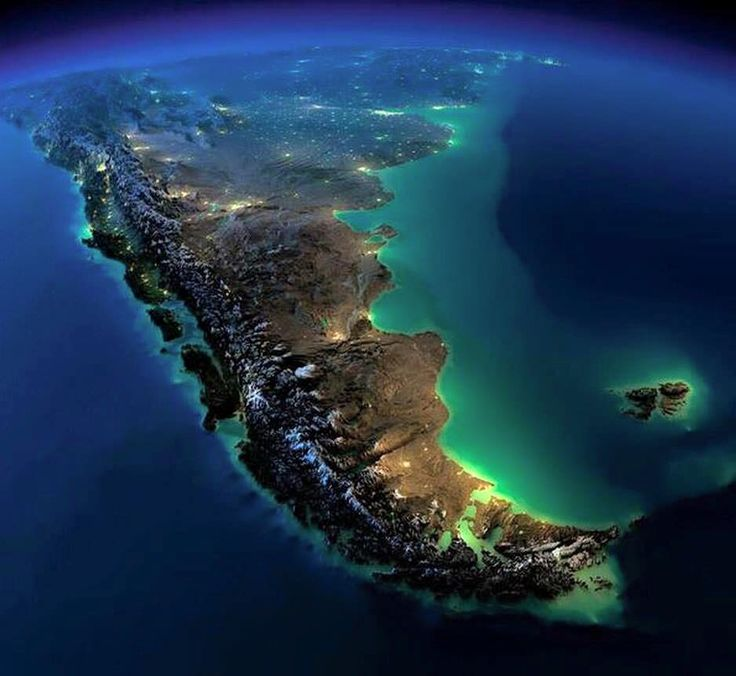

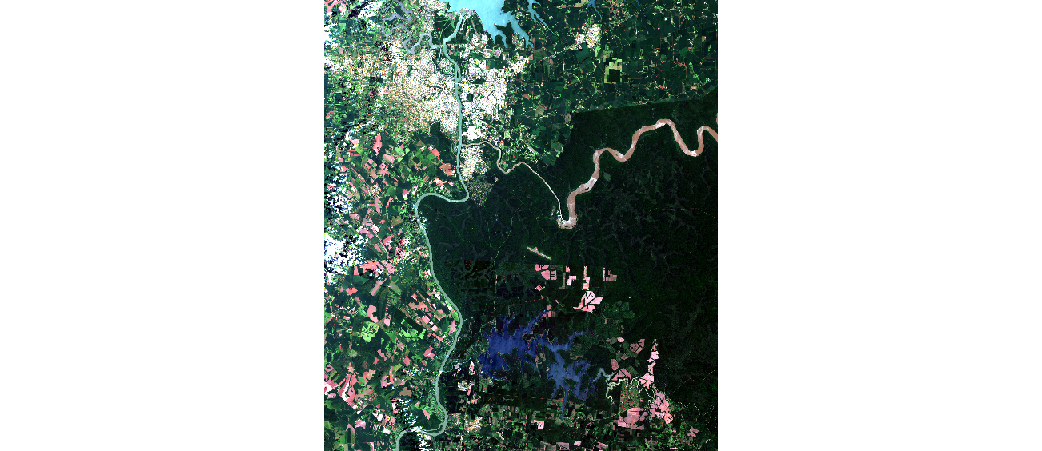

In [27]:
# 2a)
# mostramos la imagen 


# Armamos las rutas completas
ruta_img1 = os.path.join(directorio, "argentina.jpg")
ruta_img2 = os.path.join(directorio2, "LC08_224-078_2018-01-05_RGB.png")

# Abrimos las imágenes
img = Image.open(ruta_img1)
img2 = Image.open(ruta_img2)

# Mostramos las imágenes
display(img)
display(img2)




In [28]:
# Definimos el nombre del nuevo archivo
nombre_archivo = "argentina2.jpg"

# Armamos la ruta completa
ruta_salida = os.path.join(directorio, nombre_archivo)

# Guardamos la imagen
img.save(ruta_salida)

In [29]:
# 2c)
# Acá verificamos que la imagen satelital es de 4 canales, siendo el 4to el Alpha (transparencia). Algo comun en las imágenes png. 
# una imagen JPG tiene 3 canales.
print("Imagen 1 es: ", img.mode) 
print("Imagen 2 es: ", img2.mode)

# Obtener el valor de un pixel en la imagen
pixel_img = img.getpixel((200, 150))
pixel_img2 = img2.getpixel((353, 353))
print(f"Valor del pixel en (353, 353): {pixel_img}")
print(f"Valor del pixel en (200, 150): {pixel_img2}")

# Esto nos devuelve el valor de la tupla para cada una de las posiciones. Podemos ver que para la imagen 1 es de 3 bandas (RGB) y para la imagen 2 es de 4 bandas (RGBA).

Imagen 1 es:  RGB
Imagen 2 es:  RGBA
Valor del pixel en (353, 353): (64, 98, 144)
Valor del pixel en (200, 150): (104, 162, 97, 255)


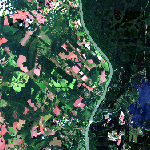

In [30]:
# 2d) Copiar una parte de la imagen en otra imagen nueva
img_cortada = img2.crop((350, 250, 500, 400)).convert("RGB")  # (left, upper, right, lower)
display(img_cortada)

In [31]:
#2e)
# Guardar la imagen cortada en un nuevo archivo
# Definimos el nombre del archivo de salida
nombre_corte = "imagen_cortada.png"

# Armamos la ruta completa
ruta_corte = os.path.join(directorio, nombre_corte)

# Guardamos la imagen cortada
img_cortada.save(ruta_corte)

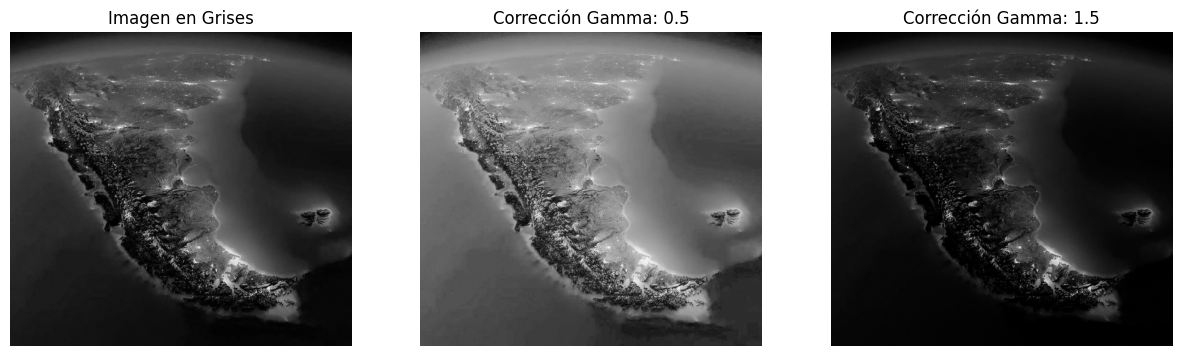

In [32]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# usamos convert para pasar la imagen 1 a niveles de gris.
img_gris = img.convert("L")

# definimos una función de corrección gamma.
# metemos la imagen en un array de numpy, aplicamos la corrección gamma y volvemos a convertir a imagen.
def correccion_gamma(img, gamma):
    img_array = np.array(img)
    # normalizamos, aplicamos gama y reescalamos nuevamente para mostrarlo. Por que la corrección gamma se hace sobre valores entre 0 y 1.
    out = (img_array / 255) ** (gamma) * 255 # esta es la corrección 
    return Image.fromarray(np.uint8(out)) # hay que convertir a uint8 para que sea una imagen válida
valores_gamma = [0.5, 1.5]
plt.figure(figsize=(15, 5))
plt.subplot(1, len(valores_gamma) + 1, 1)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en Grises')
plt.axis('off')
for i, gamma in enumerate(valores_gamma):
    img_gamma = correccion_gamma(img_gris, gamma)
    plt.subplot(1, len(valores_gamma) + 1, i + 2)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f'Corrección Gamma: {gamma}')
    plt.axis('off')

plt.show()

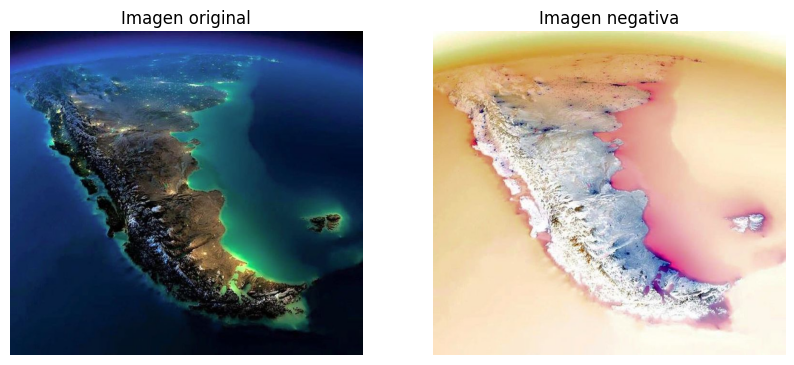

In [33]:
#4
# Función que calcula el negativo de una imagen RGB
def negativo_rgb(img):
    # Convertimos a array numpy
    img_array = np.array(img)
    # Aplicamos negativo: 255 - valor
    negativo_array = 255 - img_array
    # Reconstruimos imagen
    return Image.fromarray(negativo_array)

# Aplicamos la función
img_negativa = negativo_rgb(img)

# Mostramos imagen original y negativa
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_negativa)
plt.title("Imagen negativa")
plt.axis("off")

plt.show()


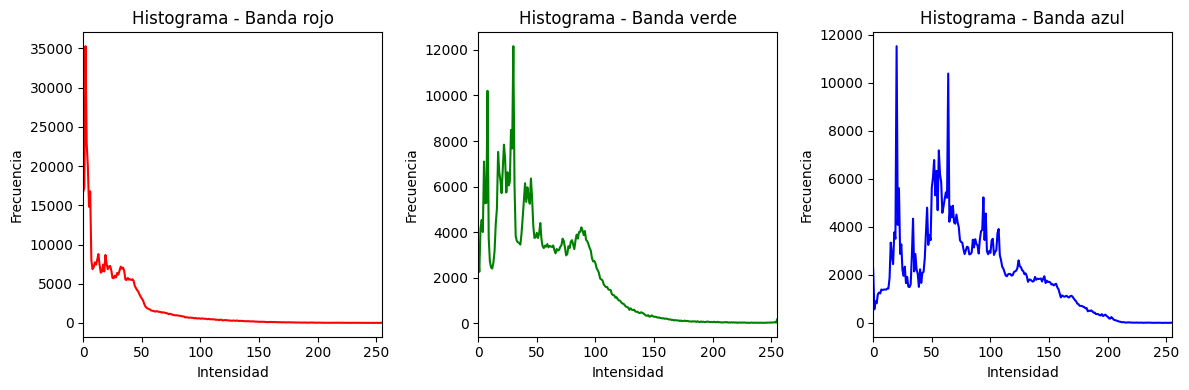

In [54]:
#5
# Función que calcula y muestra el histograma de cada banda RGB
def mostrar_histogramas_rgb(img):
    img_array = np.array(img)

    bandas = ('rojo', 'verde', 'azul')
    colores = ('red', 'green', 'blue')

    plt.figure(figsize=(12, 4))

    for i in range(3):
        banda = img_array[:, :, i]
        hist, _ = np.histogram(banda, bins=256, range=(0, 255))

        plt.subplot(1, 3, i + 1)
        plt.plot(hist, color=colores[i])
        plt.title(f'Histograma - Banda {bandas[i]}')
        plt.xlim(0, 255)
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# 🔽 Llamamos a la función directamente sobre la imagen img
mostrar_histogramas_rgb(img)

In [36]:
#6

def umbralizar_por_banda(img, umbral):
    # Convertimos imagen a array numpy
    img_array = np.array(img)

    # Separar los tres canales
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

    # Aplicamos el umbral a cada banda
    r_bin = np.where(r >= umbral, 255, 0).astype(np.uint8)
    g_bin = np.where(g >= umbral, 255, 0).astype(np.uint8)
    b_bin = np.where(b >= umbral, 255, 0).astype(np.uint8)

    # Convertimos cada uno en imagen PIL
    r_img = Image.fromarray(r_bin, mode="L")
    g_img = Image.fromarray(g_bin, mode="L")
    b_img = Image.fromarray(b_bin, mode="L")

    return r_img, g_img, b_img


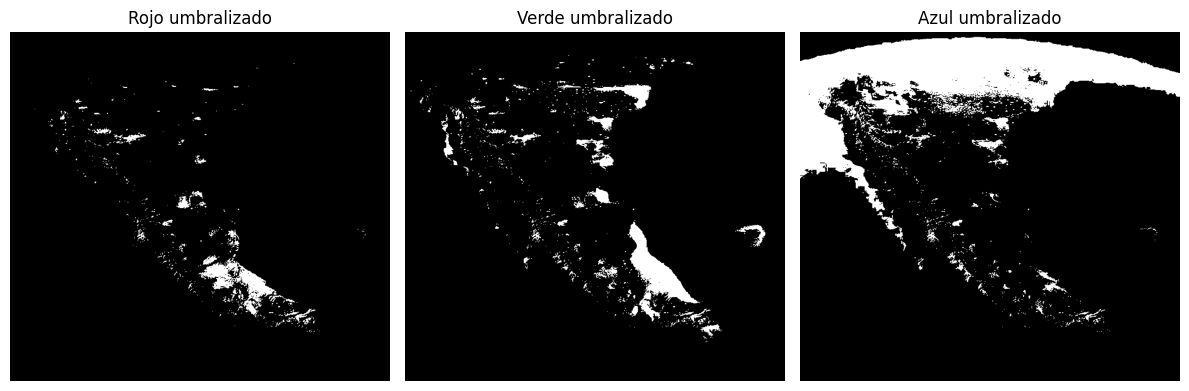

In [37]:
# Umbral deseado (por ejemplo 128)
umbral = 128

# Aplicamos la función
r_binaria, g_binaria, b_binaria = umbralizar_por_banda(img, umbral)

# Mostramos los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r_binaria, cmap="gray")
plt.title("Rojo umbralizado")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_binaria, cmap="gray")
plt.title("Verde umbralizado")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_binaria, cmap="gray")
plt.title("Azul umbralizado")
plt.axis("off")

plt.tight_layout()
plt.show()


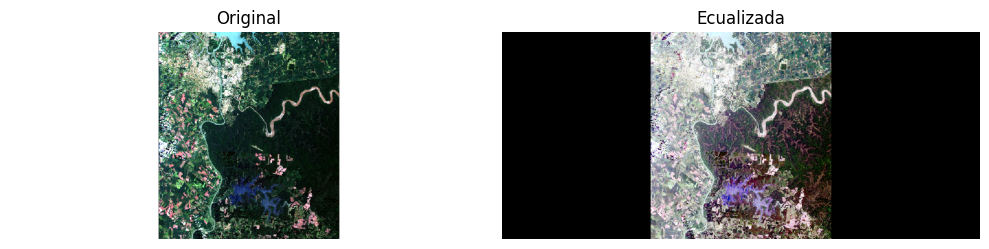

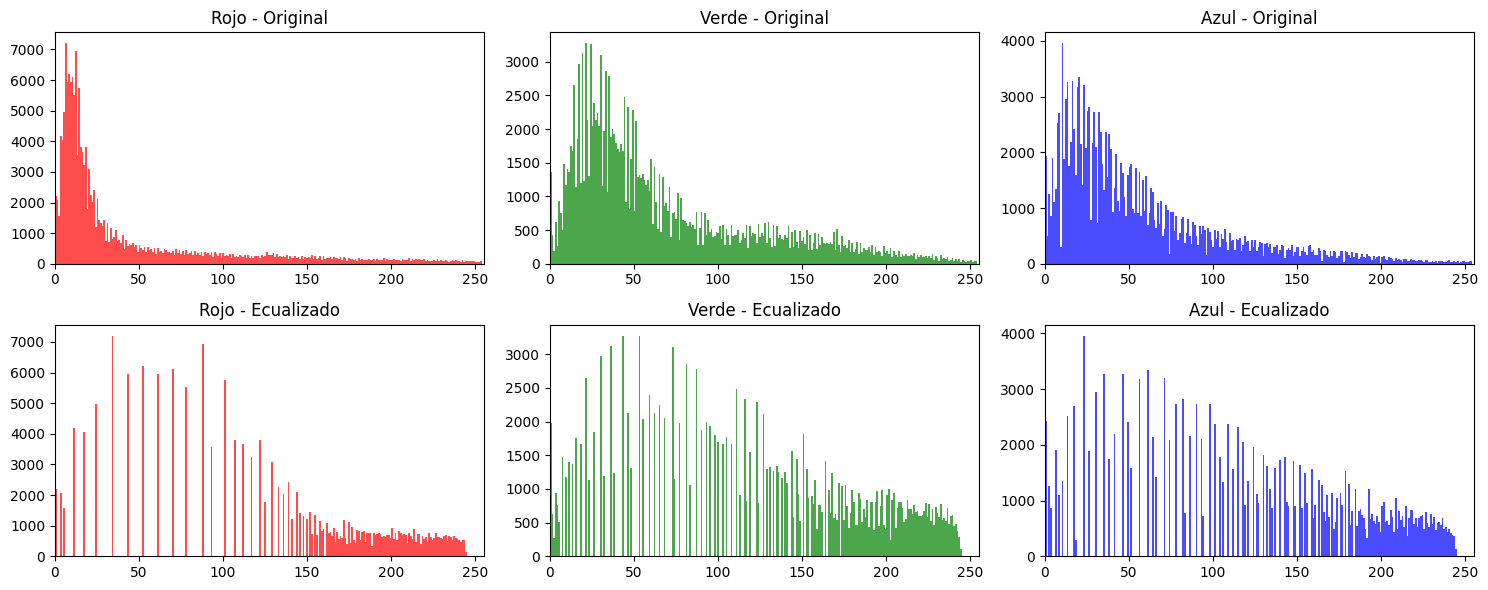

In [ ]:
#7 

def ecualizar_banda(banda):
    hist, _ = np.histogram(banda.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalizada = 255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())
    cdf_normalizada = cdf_normalizada.astype(np.uint8)
    return np.take(cdf_normalizada, banda)

# Ecualiza una imagen RGB banda por banda
def ecualizar_imagen_rgb(img):
    img_array = np.array(img)
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    r_eq = ecualizar_banda(r)
    g_eq = ecualizar_banda(g)
    b_eq = ecualizar_banda(b)
    img_eq = np.stack((r_eq, g_eq, b_eq), axis=2)  
    
    return Image.fromarray(img_eq), (r, g, b), (r_eq, g_eq, b_eq)

# Muestra los histogramas antes y después
def mostrar_histogramas_comparados(bandas_originales, bandas_ecualizadas):
    nombres = ["Rojo", "Verde", "Azul"]
    colores = ["red", "green", "blue"]
    
    plt.figure(figsize=(15, 6))

    for i in range(3):
        # Histograma original
        plt.subplot(2, 3, i + 1)
        plt.hist(bandas_originales[i].flatten(), bins=256, range=(0, 255), color=colores[i], alpha=0.7)
        plt.title(f'{nombres[i]} - Original')
        plt.xlim(0, 255)

        # Histograma ecualizado
        plt.subplot(2, 3, i + 4)
        plt.hist(bandas_ecualizadas[i].flatten(), bins=256, range=(0, 255), color=colores[i], alpha=0.7)
        plt.title(f'{nombres[i]} - Ecualizado')
        plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()
# Vemos que la 4ta banda tiene valores sobre 0 y 255, lo cuál hace que los histogramas tengan outliers ahí y no muestre el efecto ecualizador correctamente.
# Creamos una máscara para filtrar los valores válidos de la imagen satelital (sacamos 0 y 255) y mandamos

# Extraemos alpha
alpha = np.array(img2)[:, :, 3]

# Máscara 1: alpha > 0 (descartar nodata)
mask_alpha = alpha > 0

# Convertimos a RGB
img2_rgb = img2.convert("RGB")
img_array_rgb = np.array(img2_rgb)

# Máscara 2: no saturados (ningún canal == 255)
not_saturated_mask = (img_array_rgb[:, :, 0] < 255) & (img_array_rgb[:, :, 1] < 255) & (img_array_rgb[:, :, 2] < 255)

# Máscara final: combinación de ambas
valid_mask = mask_alpha & not_saturated_mask

#  Procesamos la imagen 
img_ecualizada, bandas_orig, bandas_eq = ecualizar_imagen_rgb(img2_rgb)

#  Filtramos bandas para histogramas 
r_valid = bandas_orig[0][valid_mask]
g_valid = bandas_orig[1][valid_mask]
b_valid = bandas_orig[2][valid_mask]

r_eq_valid = bandas_eq[0][valid_mask]
g_eq_valid = bandas_eq[1][valid_mask]
b_eq_valid = bandas_eq[2][valid_mask]

#  Mostramos las imágenes original y ecualizada 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_ecualizada)
plt.title("Ecualizada")
plt.axis("off")
plt.tight_layout()
plt.show()


mostrar_histogramas_comparados((r_valid, g_valid, b_valid), (r_eq_valid, g_eq_valid, b_eq_valid))


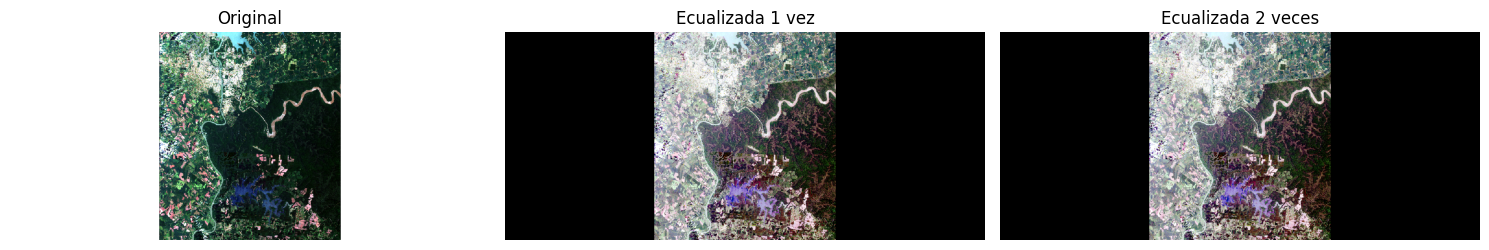

In [55]:
# Segunda ecualización
img_ecualizada_2, bandas_eq_1, bandas_eq_2 = ecualizar_imagen_rgb(img_ecualizada)

# Mostramos las imágenes: original, ecualizada 1 vez y ecualizada 2 veces
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img2)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_ecualizada)
plt.title("Ecualizada 1 vez")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_ecualizada_2)
plt.title("Ecualizada 2 veces")
plt.axis("off")

plt.tight_layout()
plt.show()


Aplicar una segunda ecualización a una imagen ya ecualizada no mejora más el contraste, ni modifica significativamente la imagen. Esto ocurre porque la primera ecualización ya redistribuyó los valores de intensidad de forma uniforme en todo el rango (0–255).
Como el histograma ya está "estirado", la función de ecualización ya no tiene efecto la segunda vez. Es decir, la segunda ecualización es prácticamente una operación neutra.

In [57]:
#9


# Función para agregar ruido gaussiano aditivo
def agregar_ruido_gaussiano(img, porcentaje, media=0, sigma=20):
    img_array = np.array(img).astype(np.float32)
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    # Creamos máscara aleatoria de píxeles a alterar
    indices = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    ruido = np.random.normal(media, sigma, cantidad_ruido)

    img_flat = img_array.reshape(-1, 3)
    img_flat[indices] += ruido[:, None]  # mismo ruido para R, G, B
    img_ruidosa = img_flat.reshape(img_array.shape)
    
    # Limitamos al rango válido y convertimos a uint8
    img_ruidosa = np.clip(img_ruidosa, 0, 255).astype(np.uint8)
    return Image.fromarray(img_ruidosa)

# Función para agregar ruido exponencial multiplicativo
def agregar_ruido_exponencial(img, porcentaje, lam=0.5):
    img_array = np.array(img).astype(np.float32)
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    indices = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    ruido = np.random.exponential(scale=1/lam, size=cantidad_ruido)

    img_flat = img_array.reshape(-1, 3)
    img_flat[indices] *= ruido[:, None]  # mismo ruido para R, G, B
    img_ruidosa = img_flat.reshape(img_array.shape)

    img_ruidosa = np.clip(img_ruidosa, 0, 255).astype(np.uint8)
    return Image.fromarray(img_ruidosa)




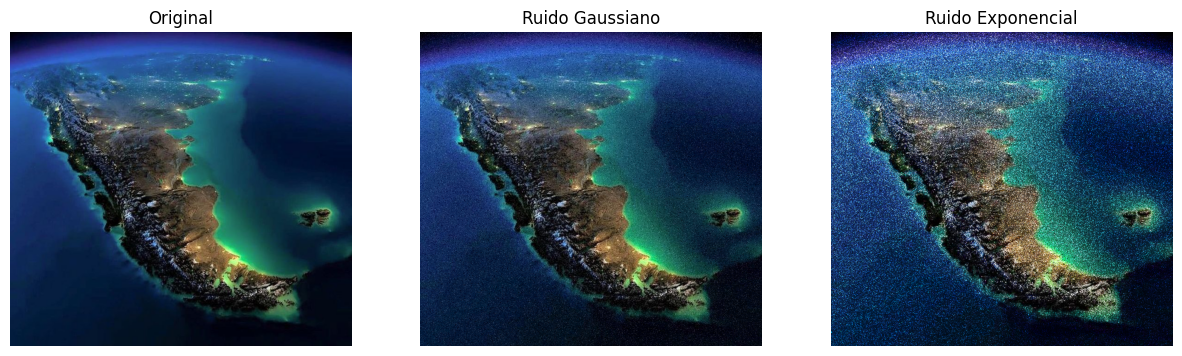

In [68]:
# Parámetros
porcentaje = 0.40  # 40% de píxeles con ruido
media = 0
sigma = 25
lam = 0.5

# Agregar ruido
img_gauss = agregar_ruido_gaussiano(img, porcentaje, media, sigma)
img_expon = agregar_ruido_exponencial(img, porcentaje, lam)

# Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gauss)
plt.title("Ruido Gaussiano")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_expon)
plt.title("Ruido Exponencial")
plt.axis("off")

plt.show()


In [70]:
#10

def agregar_ruido_sal_pimienta(img, porcentaje):
    img_array = np.array(img).copy()
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    # Seleccionamos aleatoriamente los píxeles a corromper
    coords = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    coords_2d = np.unravel_index(coords, (img_array.shape[0], img_array.shape[1]))

    # La mitad será sal (255), la otra mitad pimienta (0)
    mitad = cantidad_ruido // 2
    coords_sal = (coords_2d[0][:mitad], coords_2d[1][:mitad])
    coords_pimienta = (coords_2d[0][mitad:], coords_2d[1][mitad:])

    # Aplicamos el ruido
    img_array[coords_sal] = [255, 255, 255]    # sal
    img_array[coords_pimienta] = [0, 0, 0]      # pimienta

    return Image.fromarray(img_array)


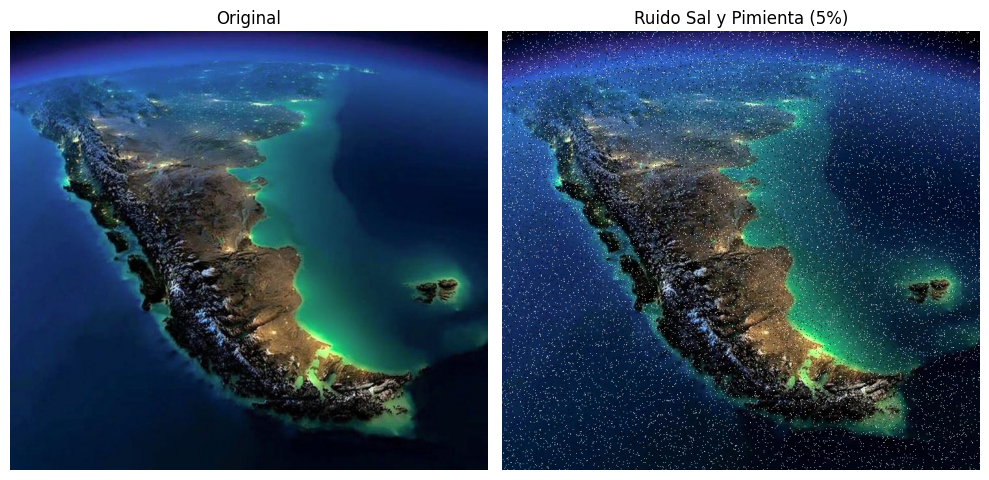

In [73]:
# Parámetro
porcentaje = 0.05  # 5% de los píxeles alterados

# Aplicamos el ruido
img_sp = agregar_ruido_sal_pimienta(img, porcentaje)


# Mostramos el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_sp)
plt.title("Ruido Sal y Pimienta (5%)")
plt.axis("off")

plt.tight_layout()
plt.show()


12

12a. Dado un píxel (x, y), definir la 8-vecindad del píxel en función de sus coordenadas. ¿Por qué es importante la vecindad? <br>
<br>
La 8-vecindad de un píxel (x, y) está formada por los 8 píxeles que lo rodean directamente, incluyendo los que están en diagonal. Es decir, considera los píxeles que están arriba, abajo, a los lados y en las esquinas respecto al píxel central. La vecindad es importante porque permite analizar relaciones locales dentro de una imagen, como bordes, texturas o continuidad de formas. También es fundamental para aplicar filtros, detectar objetos o realizar operaciones morfológicas.

12b. Dé la definición de histograma. ¿Para qué sirve estudiar el histograma de una imagen? <br>
<br>
El histograma de una imagen es una representación gráfica que muestra cuántos píxeles hay para cada nivel de intensidad, generalmente en el rango de 0 a 255. Estudiar el histograma sirve para entender cómo están distribuidos los valores de brillo en la imagen, y eso permite saber si la imagen está bien contrastada, muy oscura o muy clara. Además, el histograma es útil para aplicar técnicas de mejora de contraste como la ecualización o para definir umbrales en segmentación.

12c. ¿Qué es una banda de una imagen? ¿Cuántas bandas tiene una imagen satelital óptica? <br>
<br>
Una banda es una capa de la imagen que contiene información correspondiente a un rango específico del espectro electromagnético. Por ejemplo, en una imagen en color RGB, hay tres bandas: una para el rojo, una para el verde y una para el azul. En el caso de las imágenes satelitales ópticas, la cantidad de bandas depende del sensor, pero suelen tener entre 3 y más de 10 bandas. Por ejemplo, las imágenes del satélite Landsat 8 tienen 11 bandas, incluyendo bandas en el espectro visible, infrarrojo cercano, infrarrojo térmico y pancromática.
